In [1]:
import pandas as pd

# retrieve data for reviews
reviews = pd.read_csv('csv_data/yelp_academic_dataset_review.csv')

In [2]:
# filter only reviews with 1 or 2 stars
condition_1, condition_2 = reviews['stars'] == 1, reviews['stars'] == 2
reviews = reviews.loc[condition_1 | condition_2]

# check new dataframe
reviews

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
5,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1.0,1.0,2.0,1.0,I am a long term frequent customer of this est...,2015-09-23 23:10:31
29,elqRpX9T3YwL07uLNtN3Bg,-sryo4gDYxbZ1T5Bz4l5Bw,ltBBYdNzkeKdCNPDAsxwAA,2.0,0.0,0.0,0.0,I at least have to give this restaurant two st...,2015-02-02 04:29:13
41,RB8UpF_kT2xoOC51OzXEeA,EZjT2qJN0mOXypMAqZdSrQ,A2q7d-CBM2-81tVkmS4JMw,2.0,1.0,1.0,0.0,"Straight to the point, it's cheap, it tastes a...",2017-07-08 18:58:42
46,Ki90-hauSIfW_7sBuBBqfA,Z2cOL3n9V8NoguJ-uU_Nvw,j8JOZvfeHEfUWq3gEz6ABQ,2.0,2.0,3.0,0.0,NEVER AGAIN. This is a so called restaurant th...,2014-06-11 14:55:14
47,TcCcHzc3L6Aboq3DteEfZA,OuatwND396ZQxm2zK8WlUQ,jNL5KUPz2-tHUJM__ysSaw,1.0,1.0,0.0,0.0,If you want to pay for everything a la carte t...,2014-08-24 20:14:12
...,...,...,...,...,...,...,...,...,...
6990255,1ryZLb9pSBz0y66tHB-rfw,XJTO9x78TgWE94cmXqNduA,c3QxX3toWdqJnKQmmIliRQ,1.0,1.0,2.0,0.0,"The supper club is ridiculously expensive. So,...",2021-11-29 18:26:40
6990258,cOaCw12O2B3ER_Ir73w_bA,99_EbpwCcCRAa66YgorrKA,3MZ6DYP7EANJmP4UOW3PAw,1.0,0.0,0.0,0.0,The worst. Wish I had read all the other revie...,2016-04-27 04:14:52
6990259,tWCi4N2qCil876BI2NDAZg,5d32aJe0a3_fSl3LIVYkWQ,EmrOCT7fArKI0JI_XF6aaw,1.0,5.0,2.0,0.0,Temple University blatantly disregards freedom...,2021-08-28 18:46:05
6990268,PVRvzY0NxSU-fiK3JOXX7w,cTozFTTWjlFYc3yusdbZmA,uMVOtr16r1ELu46pWr4HCQ,1.0,0.0,0.0,0.0,Just average Thai food tonight. Bangkok has al...,2022-01-18 06:42:59


In [4]:
# create a column with the month (and year) the review was made
reviews['month'] = reviews['date'].str[0:7]

# group by month and calculate the mean star rating
reviews_by_month = reviews.groupby('month').mean()

# check new dataframe
reviews_by_month

,stars,useful,funny,cool
month,,,,
2005-03,1.615385,1.538462,1.461538,0.461538
2005-04,1.000000,0.000000,1.000000,0.000000
2005-05,1.875000,0.625000,0.625000,0.250000
2005-06,1.500000,2.000000,3.250000,0.250000
2005-07,1.727273,1.181818,0.909091,0.363636
...,...,...,...,...
2021-09,1.239375,0.550745,0.144788,0.071776
2021-10,1.249840,0.501815,0.136095,0.085344
2021-11,1.252261,0.455101,0.122005,0.072822


By simple math manipulation, $p = \frac{r_1}{r_1 + r_2} = 2 - r_\mu$ is the polarization ratio.

In [5]:
# we create a column for p
reviews_by_month['polarization_ratio'] = 2 - reviews_by_month['stars']

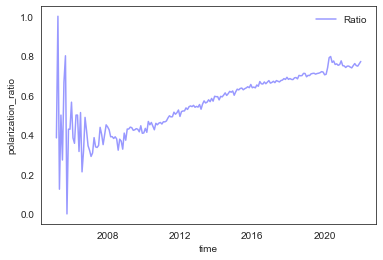

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# we now plot the data
sns.lineplot(data=reviews_by_month, x='month', y='polarization_ratio', color='blue', alpha=0.4, label='Ratio')
plt.xticks(['2008-01', '2012-01', '2016-01', '2020-01'], ['2008', '2012', '2016', '2020'])
plt.legend(loc='best', frameon=False)
plt.xlabel('time')

plt.savefig('figures/polarization_ratio.png', dpi=100)
plt.show()

In [30]:
from yelp_functions import get_processed_inputs
from sklearn.feature_extraction.text import CountVectorizer

# sample 10% of the data
reviews = reviews.sample(frac=0.1, random_state=0)

# create the BoW vectorizer based on the full data corpus
bow_inputs = get_processed_inputs(reviews)
count_vec = CountVectorizer(max_features=1024, ngram_range=(1,2))
bow_representation = count_vec.fit_transform(bow_inputs)

In [48]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

# add new column for cosine similarity
reviews_by_month['similarity'] = 0

for month in list(reviews_by_month.index.values)[24:]:

    # filter the dataframes
    reviews_rating_1 = reviews[(reviews['stars'] == 1) & (reviews['month'] == month)]
    reviews_rating_2 = reviews[(reviews['stars'] == 2) & (reviews['month'] == month)]

    # get BoW representation of the vectors and add them
    vector_1 = np.sum(count_vec.transform(get_processed_inputs(reviews_rating_1)).toarray(), axis=0)
    vector_2 = np.sum(count_vec.transform(get_processed_inputs(reviews_rating_2)).toarray(), axis=0)

    # normalize the vectors
    vector_1, vector_2 = vector_1 / sum(vector_1), vector_2 / sum(vector_2)

    # take the cosine similarity and add it to the reviews by month dataframe
    cosine_similarity = dot(vector_1, vector_2) / (norm(vector_1) * norm(vector_2))
    reviews_by_month.loc[month, 'similarity'] = cosine_similarity

# check values in the dataframe
reviews_by_month

,stars,useful,funny,cool,polarization_ratio,similarity
month,,,,,,
2005-03,1.615385,1.538462,1.461538,0.000000,0.384615,0.000000
2005-04,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
2005-05,1.875000,0.625000,0.625000,0.250000,0.125000,0.000000
2005-06,1.500000,2.000000,3.250000,0.250000,0.500000,0.000000
2005-07,1.727273,1.181818,0.909091,0.363636,0.272727,0.000000
...,...,...,...,...,...,...
2021-09,1.239375,0.550745,0.144788,0.071776,0.760625,0.902424
2021-10,1.249840,0.501815,0.136095,0.085344,0.750160,0.893319
2021-11,1.252261,0.455101,0.122005,0.072822,0.747739,0.907136


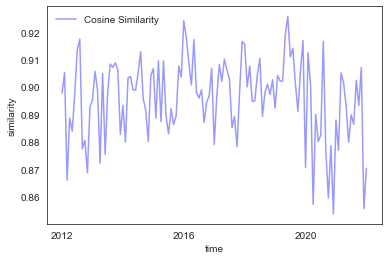

In [54]:
# remove everything before 2012
reviews_by_month = reviews_by_month[reviews_by_month['similarity'] != 0]
reviews_by_month['month'] = reviews_by_month.index
reviews_by_month = reviews_by_month[reviews_by_month['month'] >= '2012-01']

# plot the data
sns.lineplot(data=reviews_by_month, x='month', y='similarity', color='blue', alpha=0.4, label='Cosine Similarity')
plt.xticks(['2012-01', '2016-01', '2020-01'], ['2012', '2016', '2020'])
plt.legend(loc='best', frameon=False)
plt.xlabel('time')

plt.savefig('figures/polarization_cosine_similarity.png', dpi=100)
plt.show()